# Customer Retention Dataset

### E-retail factors for customer activation and retention: 
#### A case study from Indian e-commerce customers:

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

### A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: 
1.service quality
2.System quality
3.Information quality
4.Trust 
5.Net benefit.


#### Customer retention benefits:
Customer loyalty: Current customers already trust your brand, so it is easier to make them repeat customers.
Brand ambassadorship: Loyal customers act as vehicles of brand sentiment and customer acquisition via word-of-mouth marketing (e.g. testimonials and referrals).

Cost savings: Repeat customers trust the brand, so there is no need for an extensive  retention marketing strategy or advertising spend (versus new customers that require extensive spend to create brand sentiment and trust).
Improved profitability: Satisfying new and repeat customers sustains loyalty and increases the bottom line. In fact, happy customers are prone to make repeat purchases over a longer period of time.


## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Excel file:

df = pd.read_excel("E:\project flip robo\customer_retention_dataset.xlsx")

In [7]:
df.shape

(269, 71)

In [8]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

### Missing values

In [9]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

<AxesSubplot:>

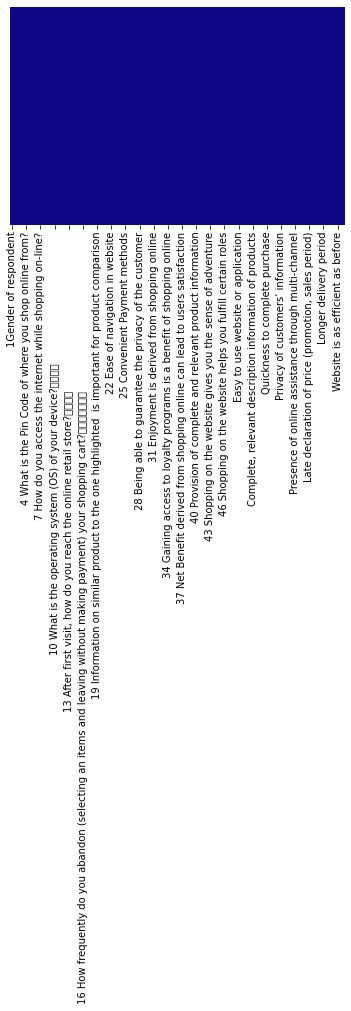

In [11]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="plasma")

## EDA

In [15]:
df.columns = map(lambda s:s.strip(), df.columns)
pd.set_option('display.max_columns', None)
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"17 Why did you abandon the “Bag”, “Shopping Cart”?",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Abo

In [16]:
#understanding the data
df.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


In [21]:
gender_percent = (df["1Gender of respondent"].value_counts()/df.shape[0])*100
print(gender_percent)

Female    67.286245
Male      32.713755
Name: 1Gender of respondent, dtype: float64


####  This dataset appears to have approximately 67% of Female respondents and approximately 32 % of Male respondents.
####  But can we simply assume that Female purchase more online than Male? No we cannot. This dataset has only 269 records and it's merely difficult to conclude the majority in general.
####  However we can assume that the data when this was recorded Female made more purchases than Male customers.

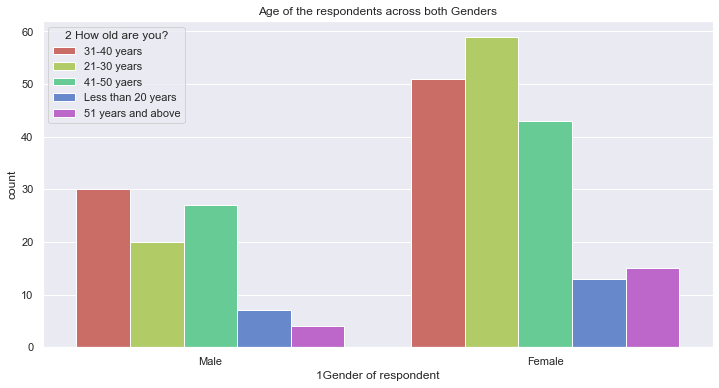

In [22]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="1Gender of respondent", data=df, palette="hls", hue="2 How old are you?").set(title='Age of the respondents across both Genders')

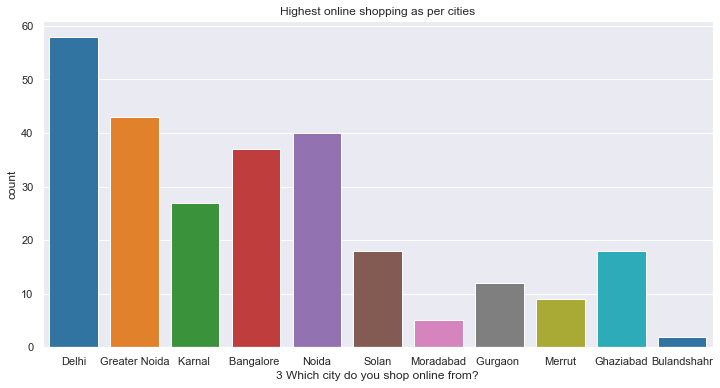

In [24]:
# Relationship between online purchases and the city:

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="3 Which city do you shop online from?", data=df, palette="tab10").set(title='Highest online shopping as per cities')

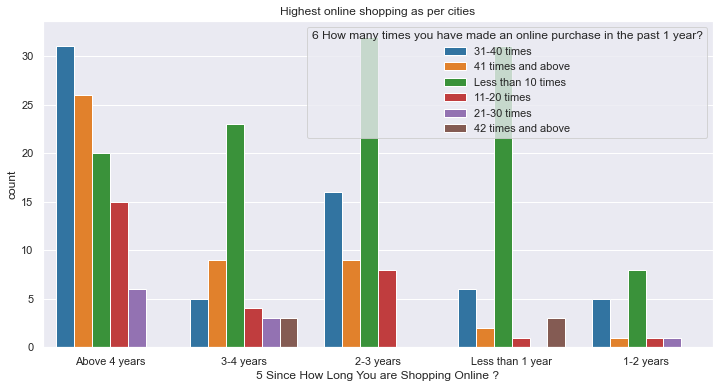

In [31]:
# Relationship between number of purchases made from online sources

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="5 Since How Long You are Shopping Online ?", data=df, hue="6 How many times you have made an online purchase in the past 1 year?", palette="tab10").set(title='Highest online shopping as per cities')

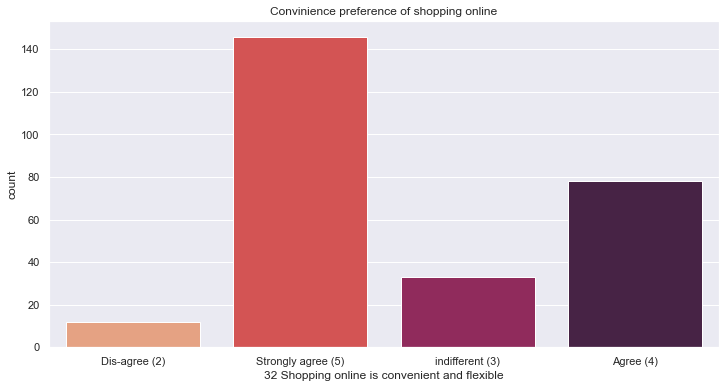

In [32]:
# customers prefer option ,shopping online is convinient and flexible

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="32 Shopping online is convenient and flexible", data=df, palette="rocket_r").set(title='Convinience preference of shopping online')

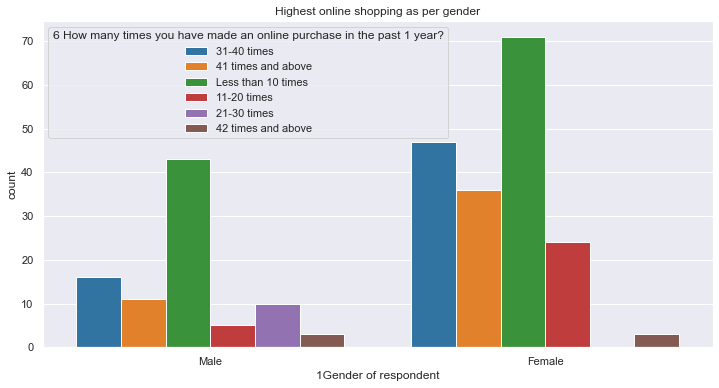

In [33]:
# Gender of respondent

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="1Gender of respondent", data=df, hue="6 How many times you have made an online purchase in the past 1 year?", palette="tab10").set(title='Highest online shopping as per gender')

### we can assume that the data when this was recorded Female made more purchases than Male customers in the past 1 year

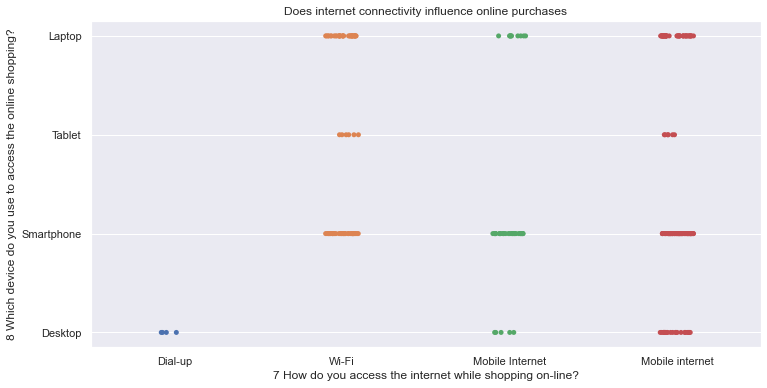

In [34]:
# Devices that customers prefer using to make online purchases:

plt.figure(figsize=(12, 6))
g = sns.stripplot(x="7 How do you access the internet while shopping on-line?",y="8 Which device do you use to access the online shopping?", 
                  data=df).set(title='Does internet connectivity influence online purchases')

#### This indicates the customers prefer ordering / shopping online and prefer "Smartphones" followed by "Laptops". These are 2 devices that are very common to have with most of the people whether they are working class or not.

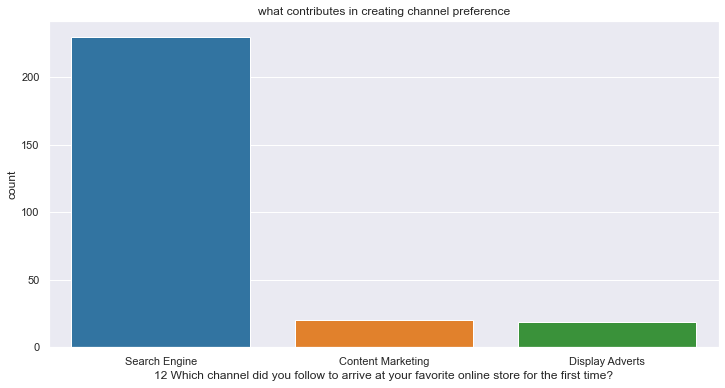

In [35]:
# Relationship between channel and online store:

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="12 Which channel did you follow to arrive at your favorite online store for the first time?", 
                   data=df, palette="tab10").set(title='what contributes in creating channel preference')

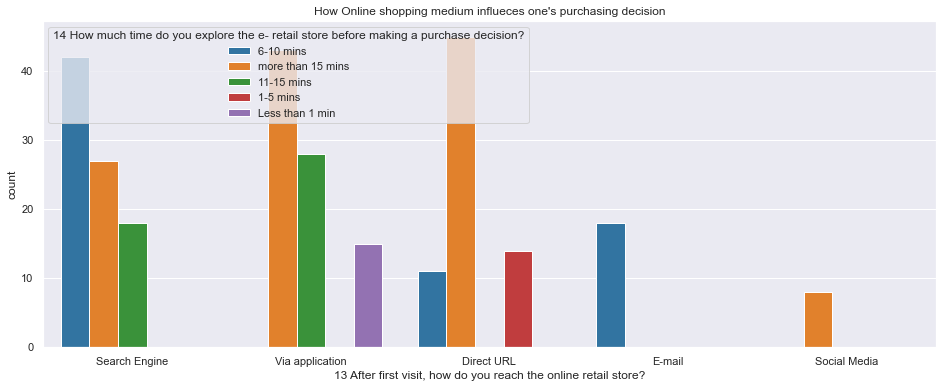

In [36]:
# Plot graph between browsing through "Search Engine" as mentioned earlier, "Via application" or through "Direct URL"

plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="13 After first visit, how do you reach the online retail store?"
                   , data=df, hue="14 How much time do you explore the e- retail store before making a purchase decision?", 
                   palette="tab10").set(title="How Online shopping medium influeces one's purchasing decision")

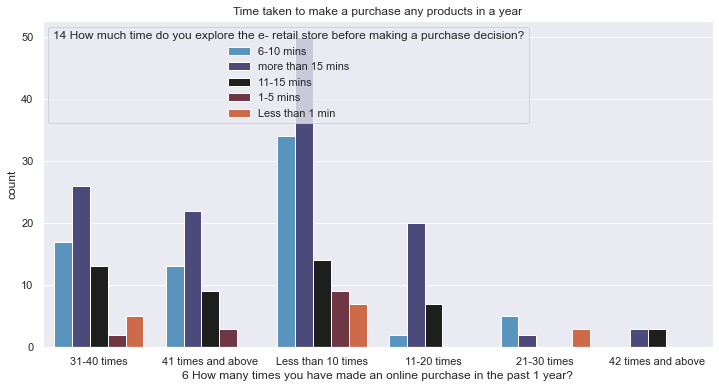

In [37]:
# Purchase in the past 1 year and Time taken to make a purchase:

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="6 How many times you have made an online purchase in the past 1 year?"
                   , data=df, hue="14 How much time do you explore the e- retail store before making a purchase decision?", 
                   palette="icefire").set(title='Time taken to make a purchase any products in a year')

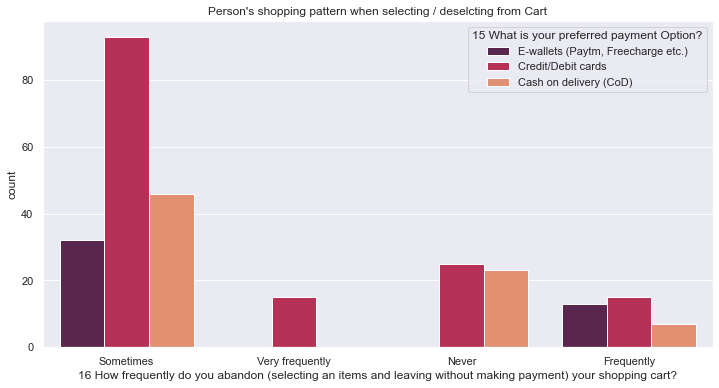

In [38]:
# "Sometimes" end up not shopping online, decline in Credit/Devit cards, no availablility of EMI or availbility of EMI on specific Banks cards only etc.

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?", 
                     data=df, hue="15 What is your preferred payment Option?", palette="rocket").set(title="Person's shopping pattern when selecting / deselcting from Cart")

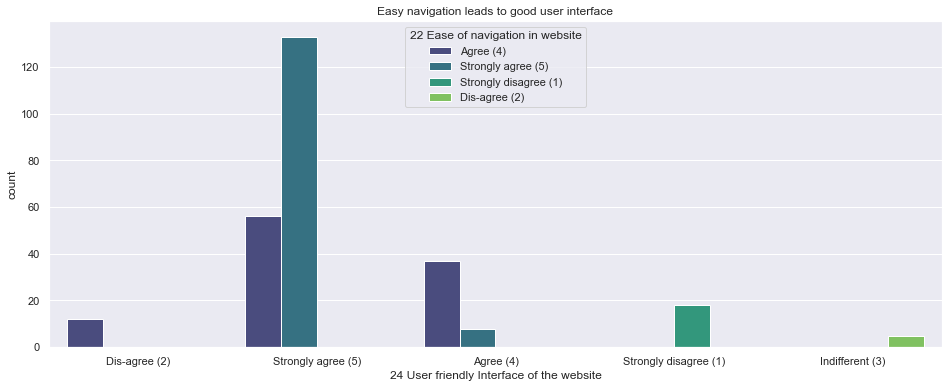

In [39]:
# very good user interface that inturn helps in ease of navigation / multiple E-Commerece channels but still we pick only handful of them for most of our shopping needs.
 

plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="24 User friendly Interface of the website", 
                   data=df, hue="22 Ease of navigation in website", palette="viridis").set(title='Easy navigation leads to good user interface')

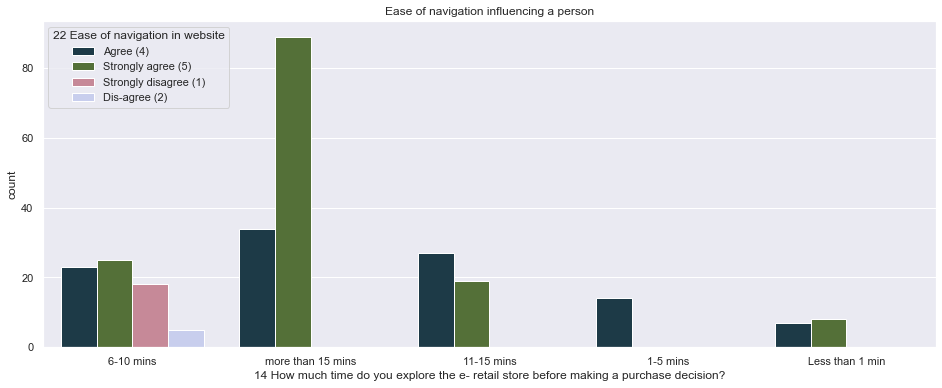

In [40]:
# Ease of navigation, there are good amount chances for a person ending up buying product

plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="14 How much time do you explore the e- retail store before making a purchase decision?", 
                   data=df, hue="22 Ease of navigation in website", palette="cubehelix").set(title='Ease of navigation influencing a person')

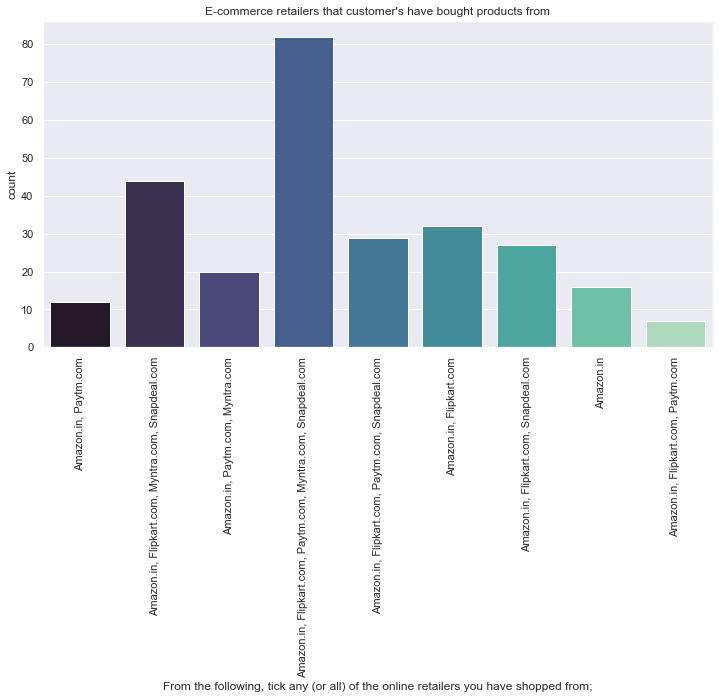

In [41]:
# Plot the preference of E-Commerce retailers the customer prefer in general 
# website Amazon, Flipkart, Paytm, Myntra and Snapdeal are the most preferred online retailers. 

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="From the following, tick any (or all) of the online retailers you have shopped from;",data=df, 
                   palette="mako").set(title="E-commerce retailers that customer's have bought products from")
plt.xticks(rotation=90)
plt.show()

####  We can see that Amazon, Flipkart, Paytm, Myntra and Snapdeal are the most preferred online retailers. 

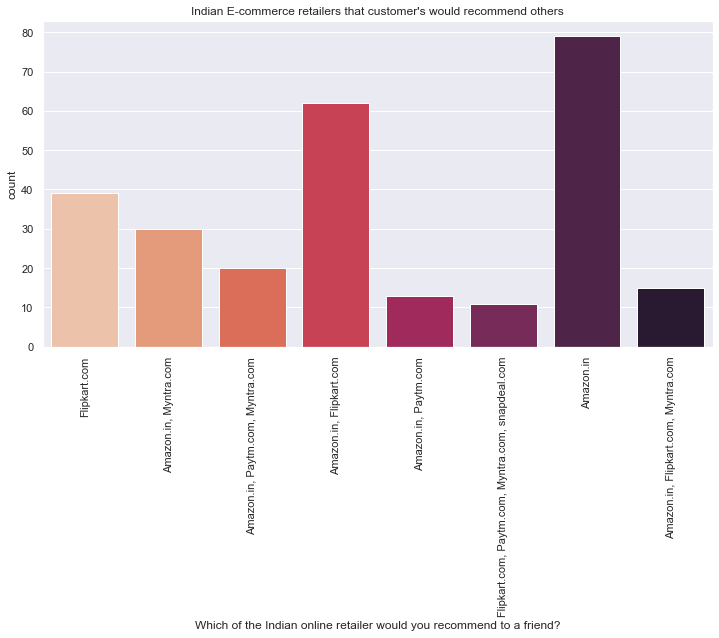

In [42]:
# Plot majority of Indians prefer Amazon.in over other E-Commerce retailers.

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Which of the Indian online retailer would you recommend to a friend?", 
                   data=df, palette="rocket_r").set(title="Indian E-commerce retailers that customer's would recommend others")
plt.xticks(rotation=90)
plt.show()

#### We observe from plot that majority of Indians prefer Amazon.in  rather than other E-Commerce retailers.


#### We observe that Amazon.in widely used than other E-Commerce retailers.


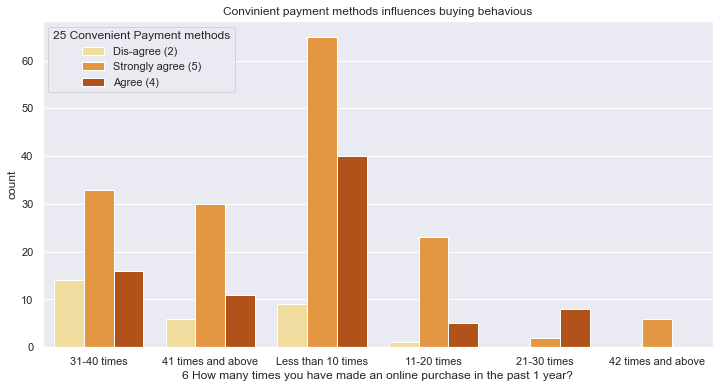

In [44]:
# Plot graph, people agree on the importance of convinient payment method:

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="6 How many times you have made an online purchase in the past 1 year?", data=df, palette="YlOrBr", 
                   hue="25 Convenient Payment methods").set(title='Convinient payment methods influences buying behavious')

plt.show()

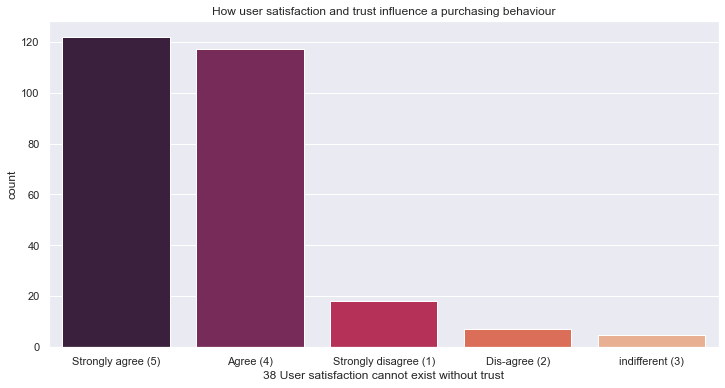

In [46]:
# Plot clearly states that trust is very much important if a person makes purchases online.
# E-Commerce retailers provide ratings of products, rating of retailers, possitive and negative feedbacks, reviews etc


plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="38 User satisfaction cannot exist without trust", 
                   data=df, palette="rocket").set(title='How user satisfaction and trust influence a purchasing behaviour')

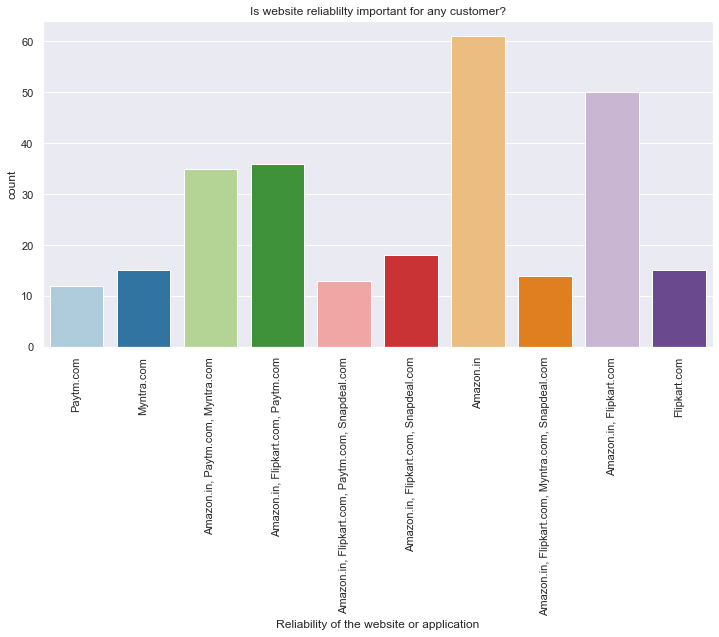

In [49]:
# Amazon has good customer base follwed by Flipkart and are have more reliable and stable platform / website compared to others. In short, these are trusted openly copared to other E-Commerce brands.


plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Reliability of the website or application", 
                   data=df, palette="Paired").set(title='Is website reliablilty important for any customer?')

plt.xticks(rotation=90)
plt.show()

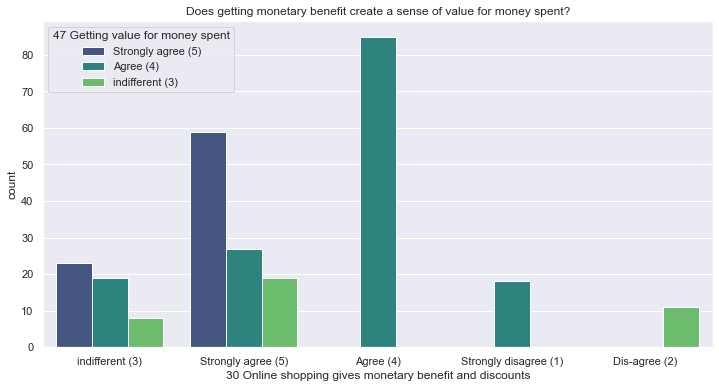

In [50]:
# 30 Online shopping gives monetary benefit and discounts

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="30 Online shopping gives monetary benefit and discounts", 
                    data=df, palette="viridis", hue= "47 Getting value for money spent").set(title='Does getting monetary benefit create a sense of value for money spent?')

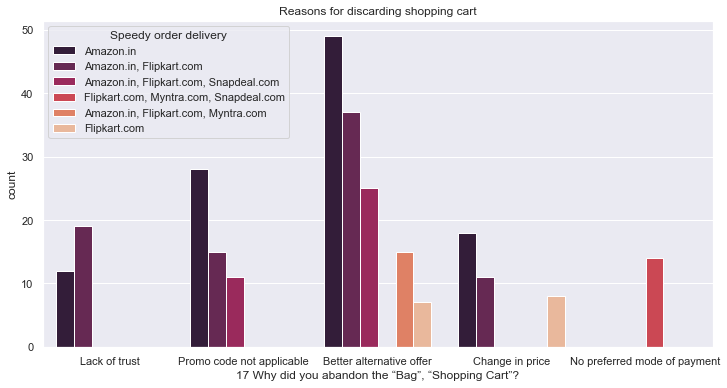

In [51]:
# Offers, goodies, slight savings etc. highly influence a person's purchasing behaviour
# Amazon appears to have such perks more than other websites, either "Better alternative offer" or if "Promo code isn't applicable" compared to other reasons.
# purchasing electronic goods like Laptops, Smartphones or Smart TV's etc. 
# as different retailer sell same or similar product and location frm where the product is manufacture or shipped from can increase or decrease price to some extent.


plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="17 Why did you abandon the “Bag”, “Shopping Cart”?", 
                   data=df, palette="rocket", hue= "Speedy order delivery").set(title='Reasons for discarding shopping cart')

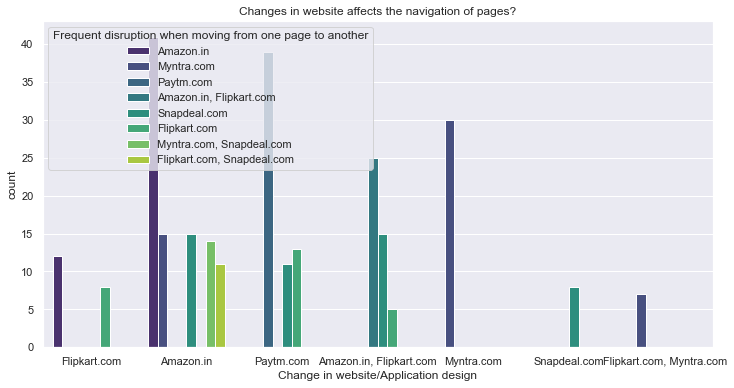

In [52]:
# The below plot website change or shutdown affects the smooth purchasing.

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(hue="Frequent disruption when moving from one page to another",
                     data=df, palette="viridis", x= "Change in website/Application design").set(title='Changes in website affects the navigation of pages?')

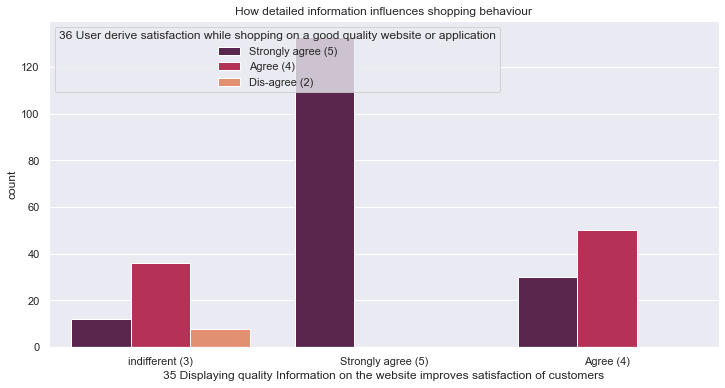

In [55]:
# Purchaing satisfaction also because of good quaity of website
# Quality of information and detailed information is very much important.

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="35 Displaying quality Information on the website improves satisfaction of customers", data=df,
                     palette="rocket", hue= "36 User derive satisfaction while shopping on a good quality website or application").set(title='How detailed information influences shopping behaviour')

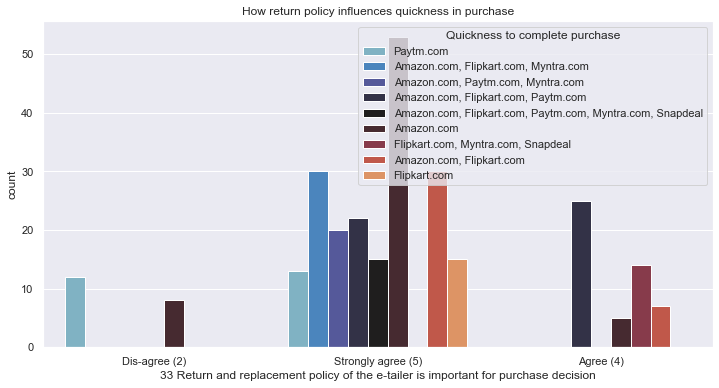

In [56]:
# The return and return policy
# This in turn increases the loyalty of customers


plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="33 Return and replacement policy of the e-tailer is important for purchase decision", data=df, 
                   palette="icefire", hue= "Quickness to complete purchase").set(title='How return policy influences quickness in purchase')

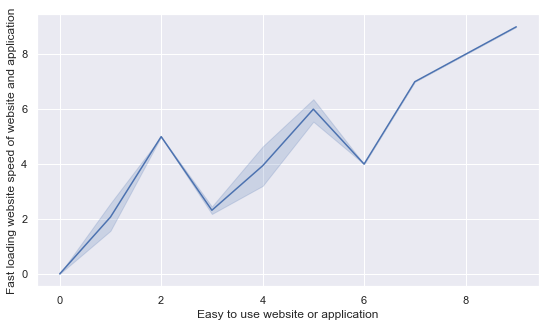

In [69]:
#Easy to use website or application
plt.figure(figsize=(9,5))
sns.lineplot(x="Easy to use website or application",y="Fast loading website speed of website and application",data=df)
plt.show()

## Preprocessing


### Encoding the dataset

### List of all the categorical columns have been passed to LabelEncoder as shown below


In [3]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [4]:
from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()
df=lab_enc.fit_transform(df["Which of the Indian online retailer would you recommend to a friend?"])
pd.Series(df)

0      6
1      3
2      5
3      1
4      3
      ..
264    0
265    6
266    0
267    0
268    0
Length: 269, dtype: int32

## Dataset appears to have approximately 67% of Female respondents and approximately 32 % of Male respondents
## Female purchase more online than Male

## Here highest customer retention and satisfaction goes to Amazon and Flipkart.